In [1]:
import serial
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft, ifft
import math

start=0
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

data = pd.read_csv("../All_Data/220304拿放水壺(坐著)/手2022-03-04 115300.csv")
data = np.array(data)
length=[]
for i in range(len(data)):
    length.append(i)
# print(len(length))
Spectrum=[]
Spectrum_index=list(range(0, 100))
index=0

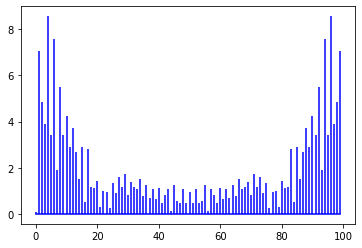

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


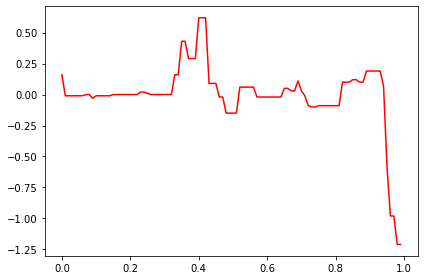

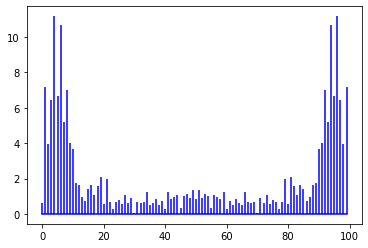

/Users/linjunting/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


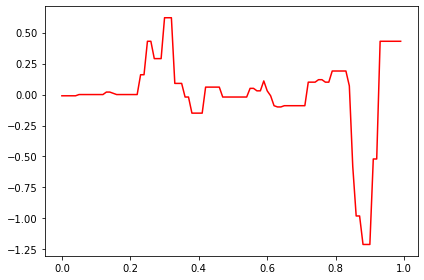

In [2]:
for i in range (0,20,10):
#     x=np.real(fft(data[start+(sr*i):start+((i+1)*sr),1]))
    x=(data[start+i:start+i+sr,1])
    X = fft(x)
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    Spectrum.append(np.abs(X))
#     plt.xlabel('Freq (Hz)', fontsize = 40, labelpad = 20)
#     plt.ylabel('FFT Amplitude |X(freq)|', fontsize = 40, labelpad = 20)
    plt.show()
#     plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
#     plt.xticks(fontsize = 30)
#     plt.yticks(fontsize = 30)
    plt.plot(t, ifft(X), 'r')
#     plt.xlabel('Time (s)', fontsize = 40, labelpad = 20)
#     plt.ylabel('Amplitude', fontsize = 40, labelpad = 20)
    plt.tight_layout()
    plt.show()

In [3]:
print(Spectrum)

[array([0.08      , 7.06991619, 4.84012814, 3.89420356, 8.55611835,
       3.41026625, 7.55811154, 1.91818772, 5.48548022, 3.40009235,
       4.23982962, 2.88649801, 3.73553198, 2.68590409, 1.52921973,
       2.90259621, 0.50857008, 2.80590501, 1.16385396, 1.10346056,
       1.43330437, 0.31291755, 1.00956707, 0.95826889, 0.27166463,
       1.32966161, 0.91309854, 1.60161296, 1.14414139, 1.74349922,
       0.81243141, 1.37130137, 1.17907098, 1.05851012, 1.5266778 ,
       0.75538669, 1.2557778 , 0.66752551, 1.06194138, 0.65393982,
       1.10609157, 0.47009128, 0.81333462, 1.09722757, 0.11634085,
       1.24996413, 0.55234786, 0.46041627, 1.08624127, 0.45994074,
       0.96      , 0.45994074, 1.08624127, 0.46041627, 0.55234786,
       1.24996413, 0.11634085, 1.09722757, 0.81333462, 0.47009128,
       1.10609157, 0.65393982, 1.06194138, 0.66752551, 1.2557778 ,
       0.75538669, 1.5266778 , 1.05851012, 1.17907098, 1.37130137,
       0.81243141, 1.74349922, 1.14414139, 1.60161296, 0.9130

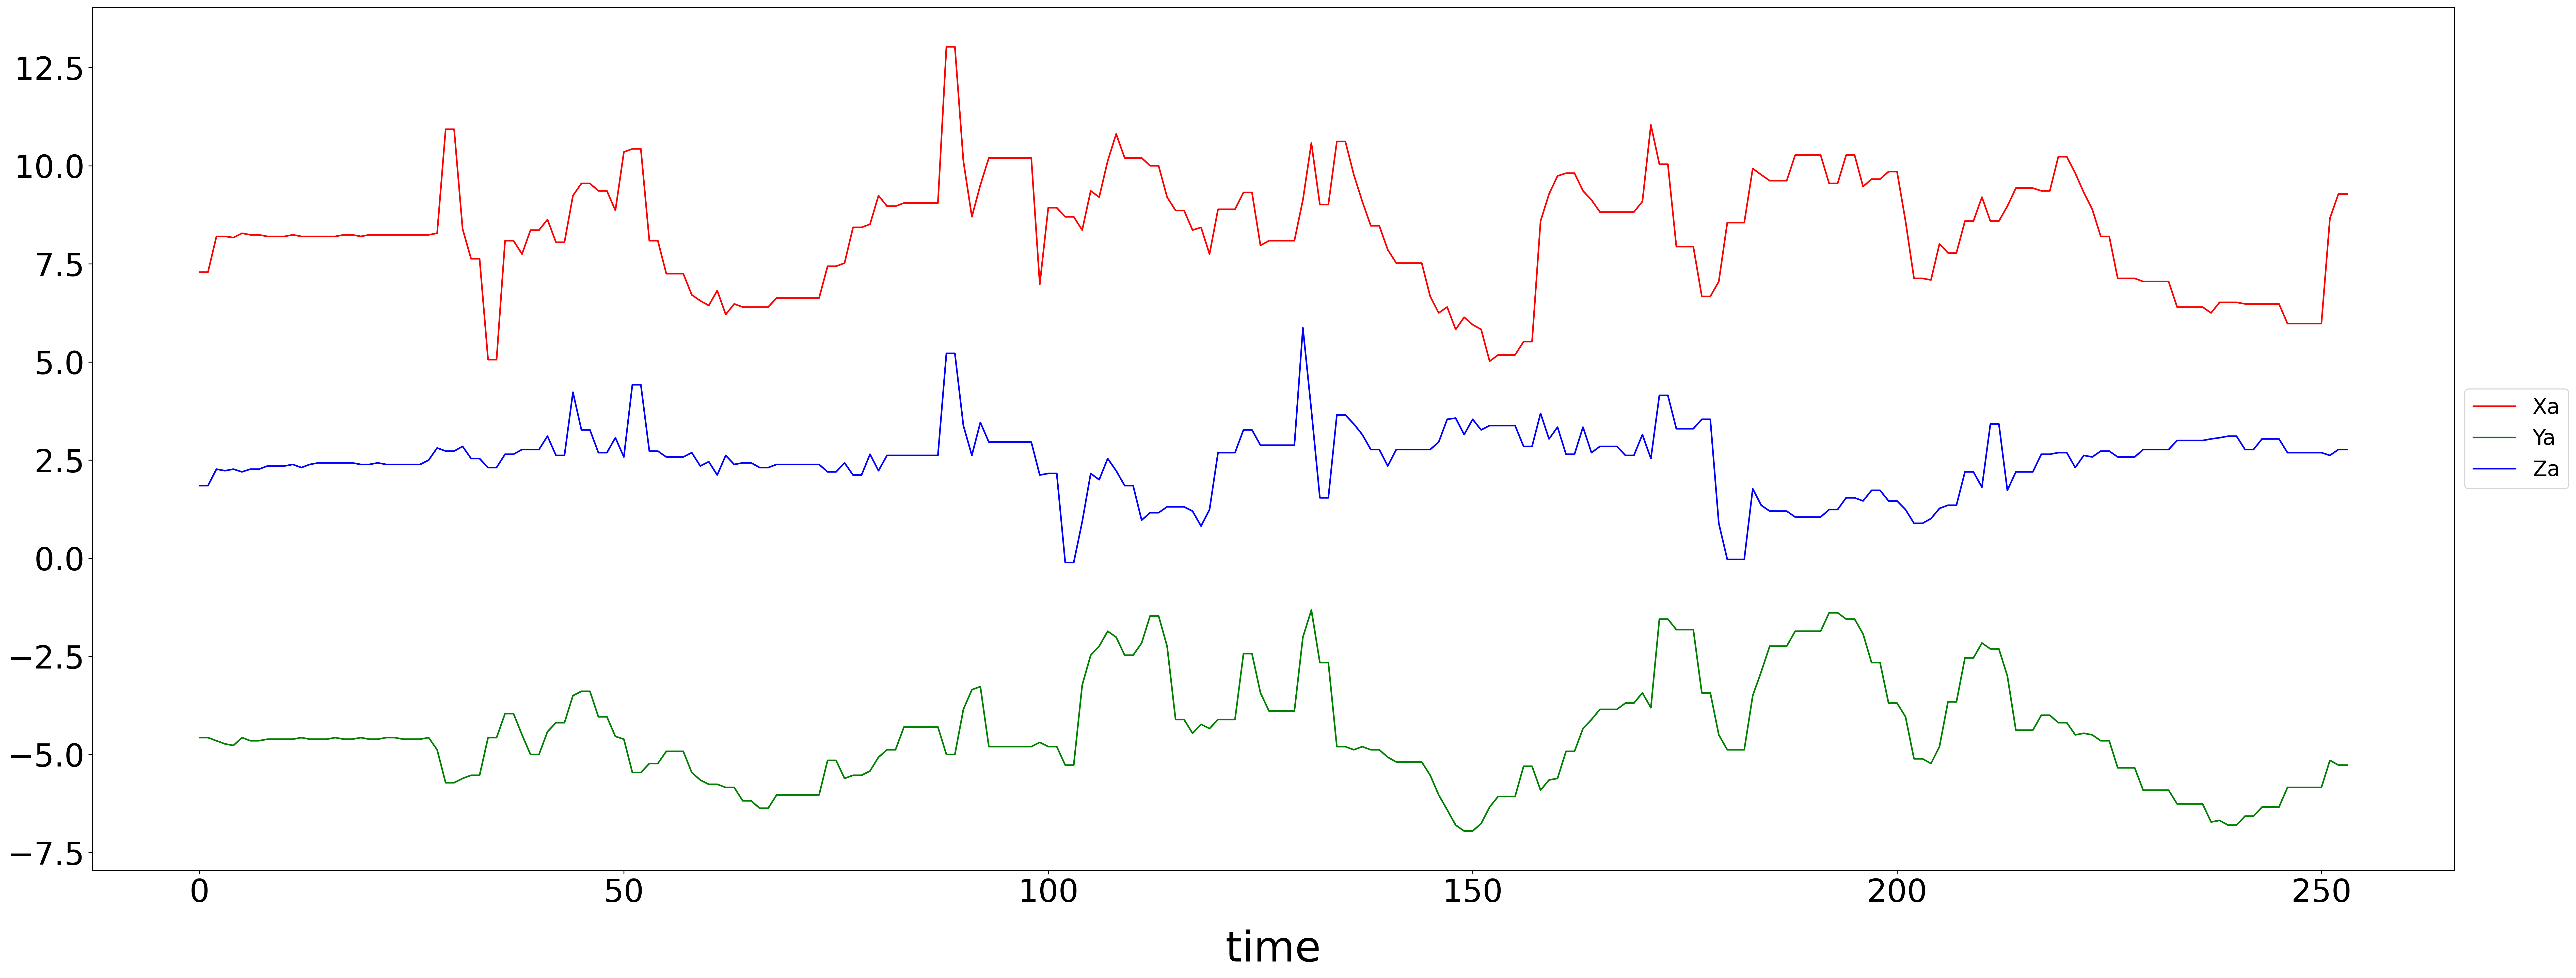

In [4]:
# show all data
plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xlabel("time", fontsize = 40, labelpad = 20)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.plot(length, data[:,7], color = 'r', label = "Xa")
plt.plot(length, data[:,8], color = 'g', label = "Ya")
plt.plot(length, data[:,9], color = 'b', label = "Za")
plt.legend(loc = "center left", fontsize = 20, bbox_to_anchor = (1, 0.5))
plt.show()

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21471/3517152436.py:14: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=254).
  plt.specgram(data[:,1],Fs=1,cmap='plasma')


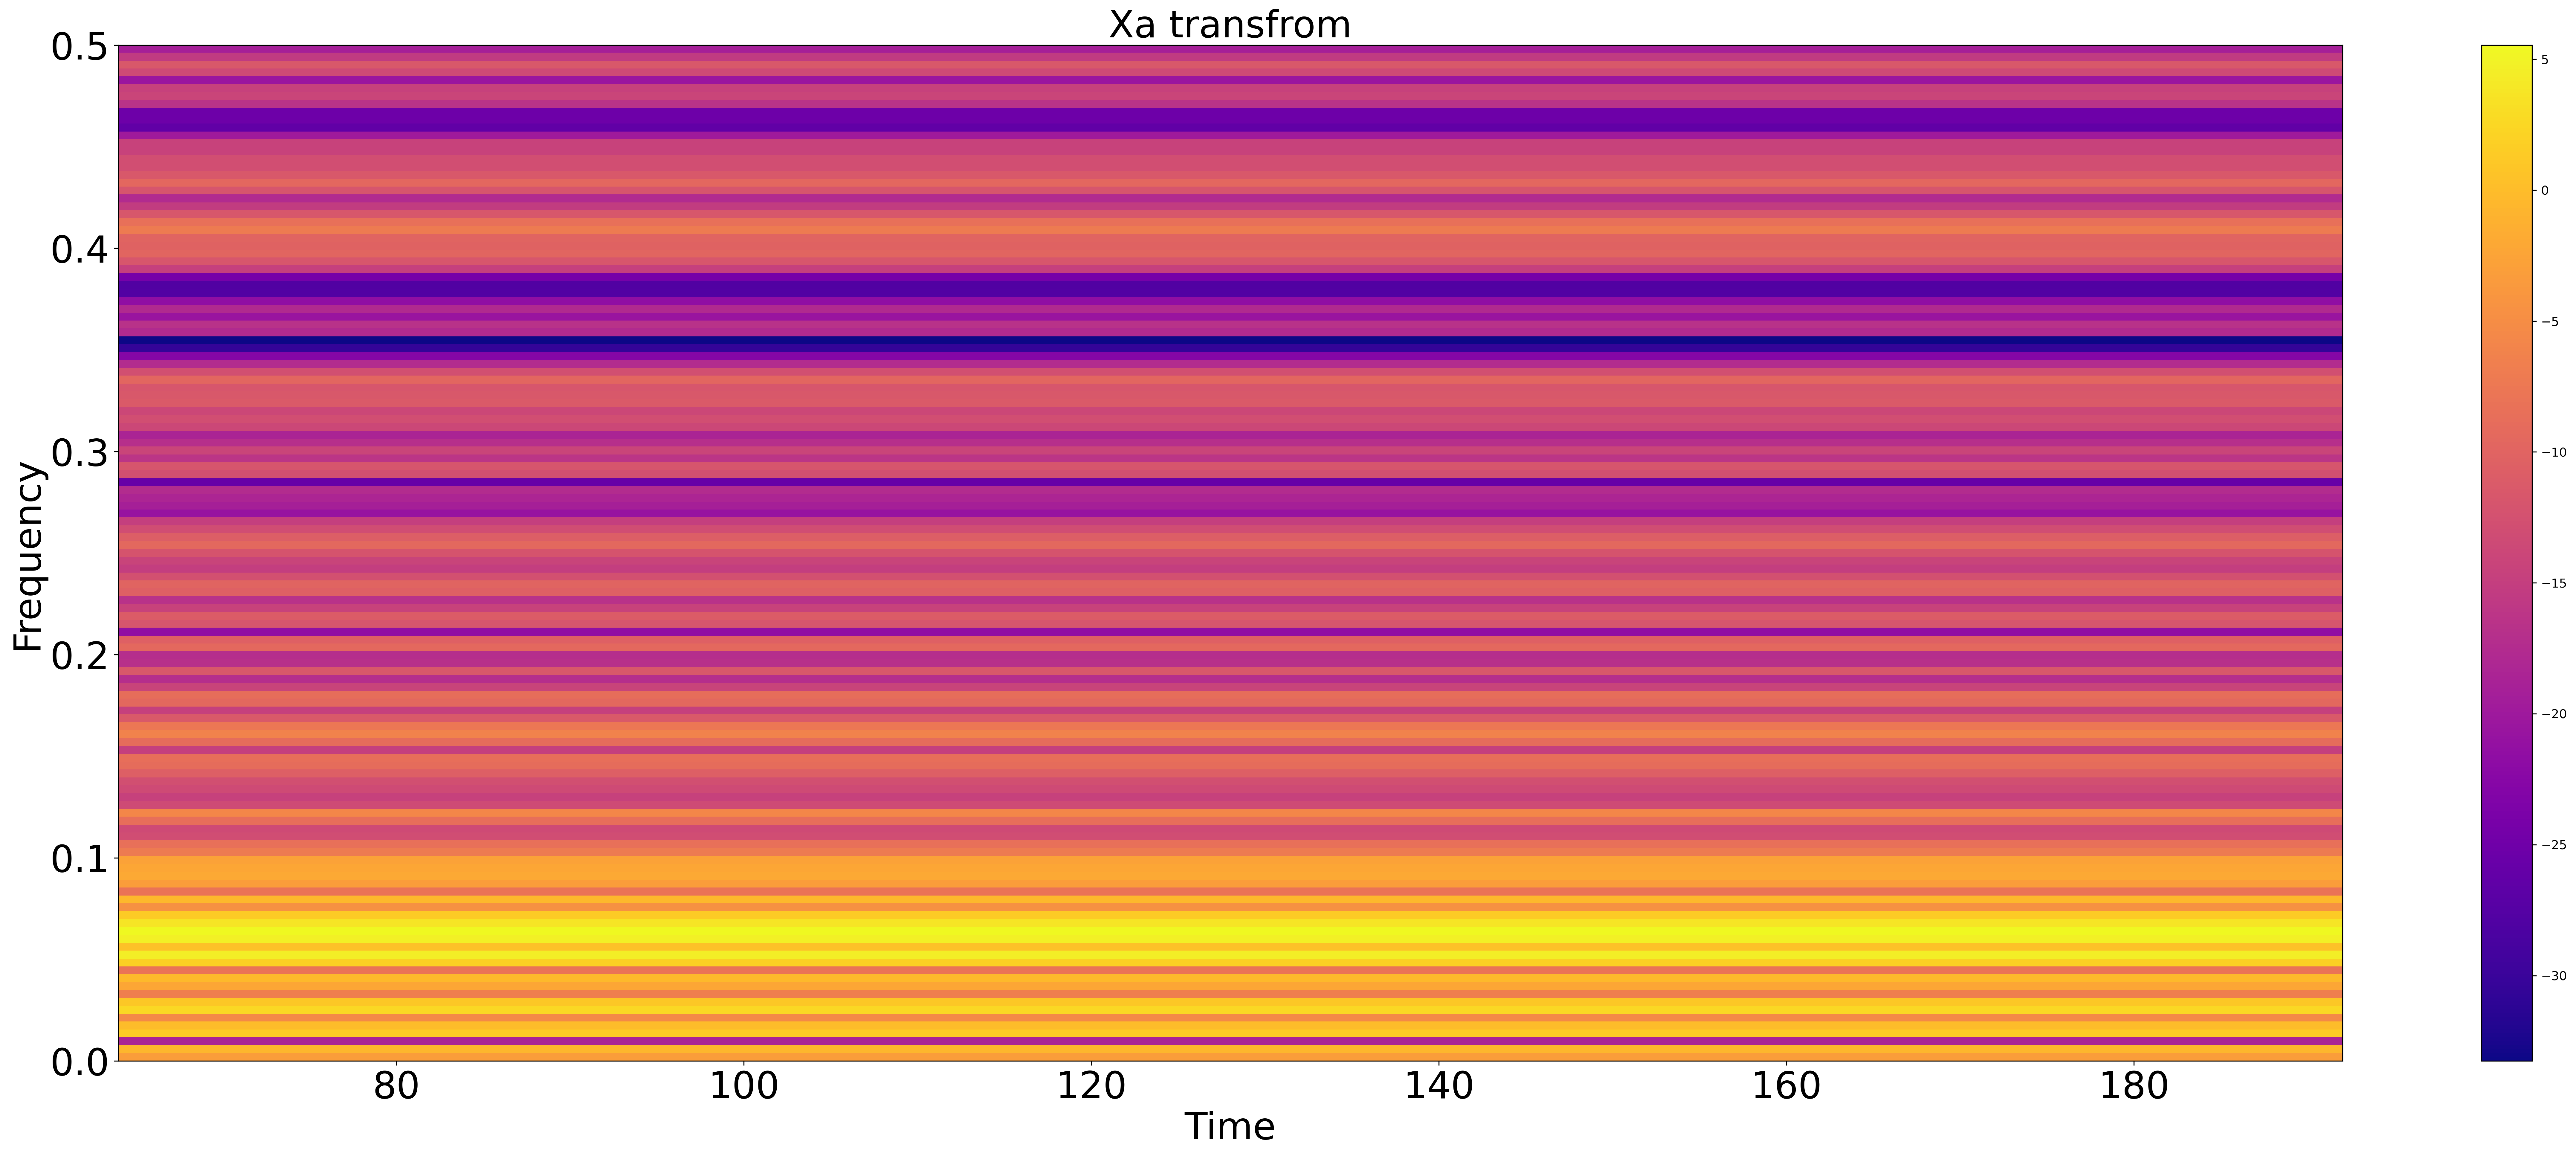

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21471/3517152436.py:24: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=254).
  plt.specgram(data[:,2])


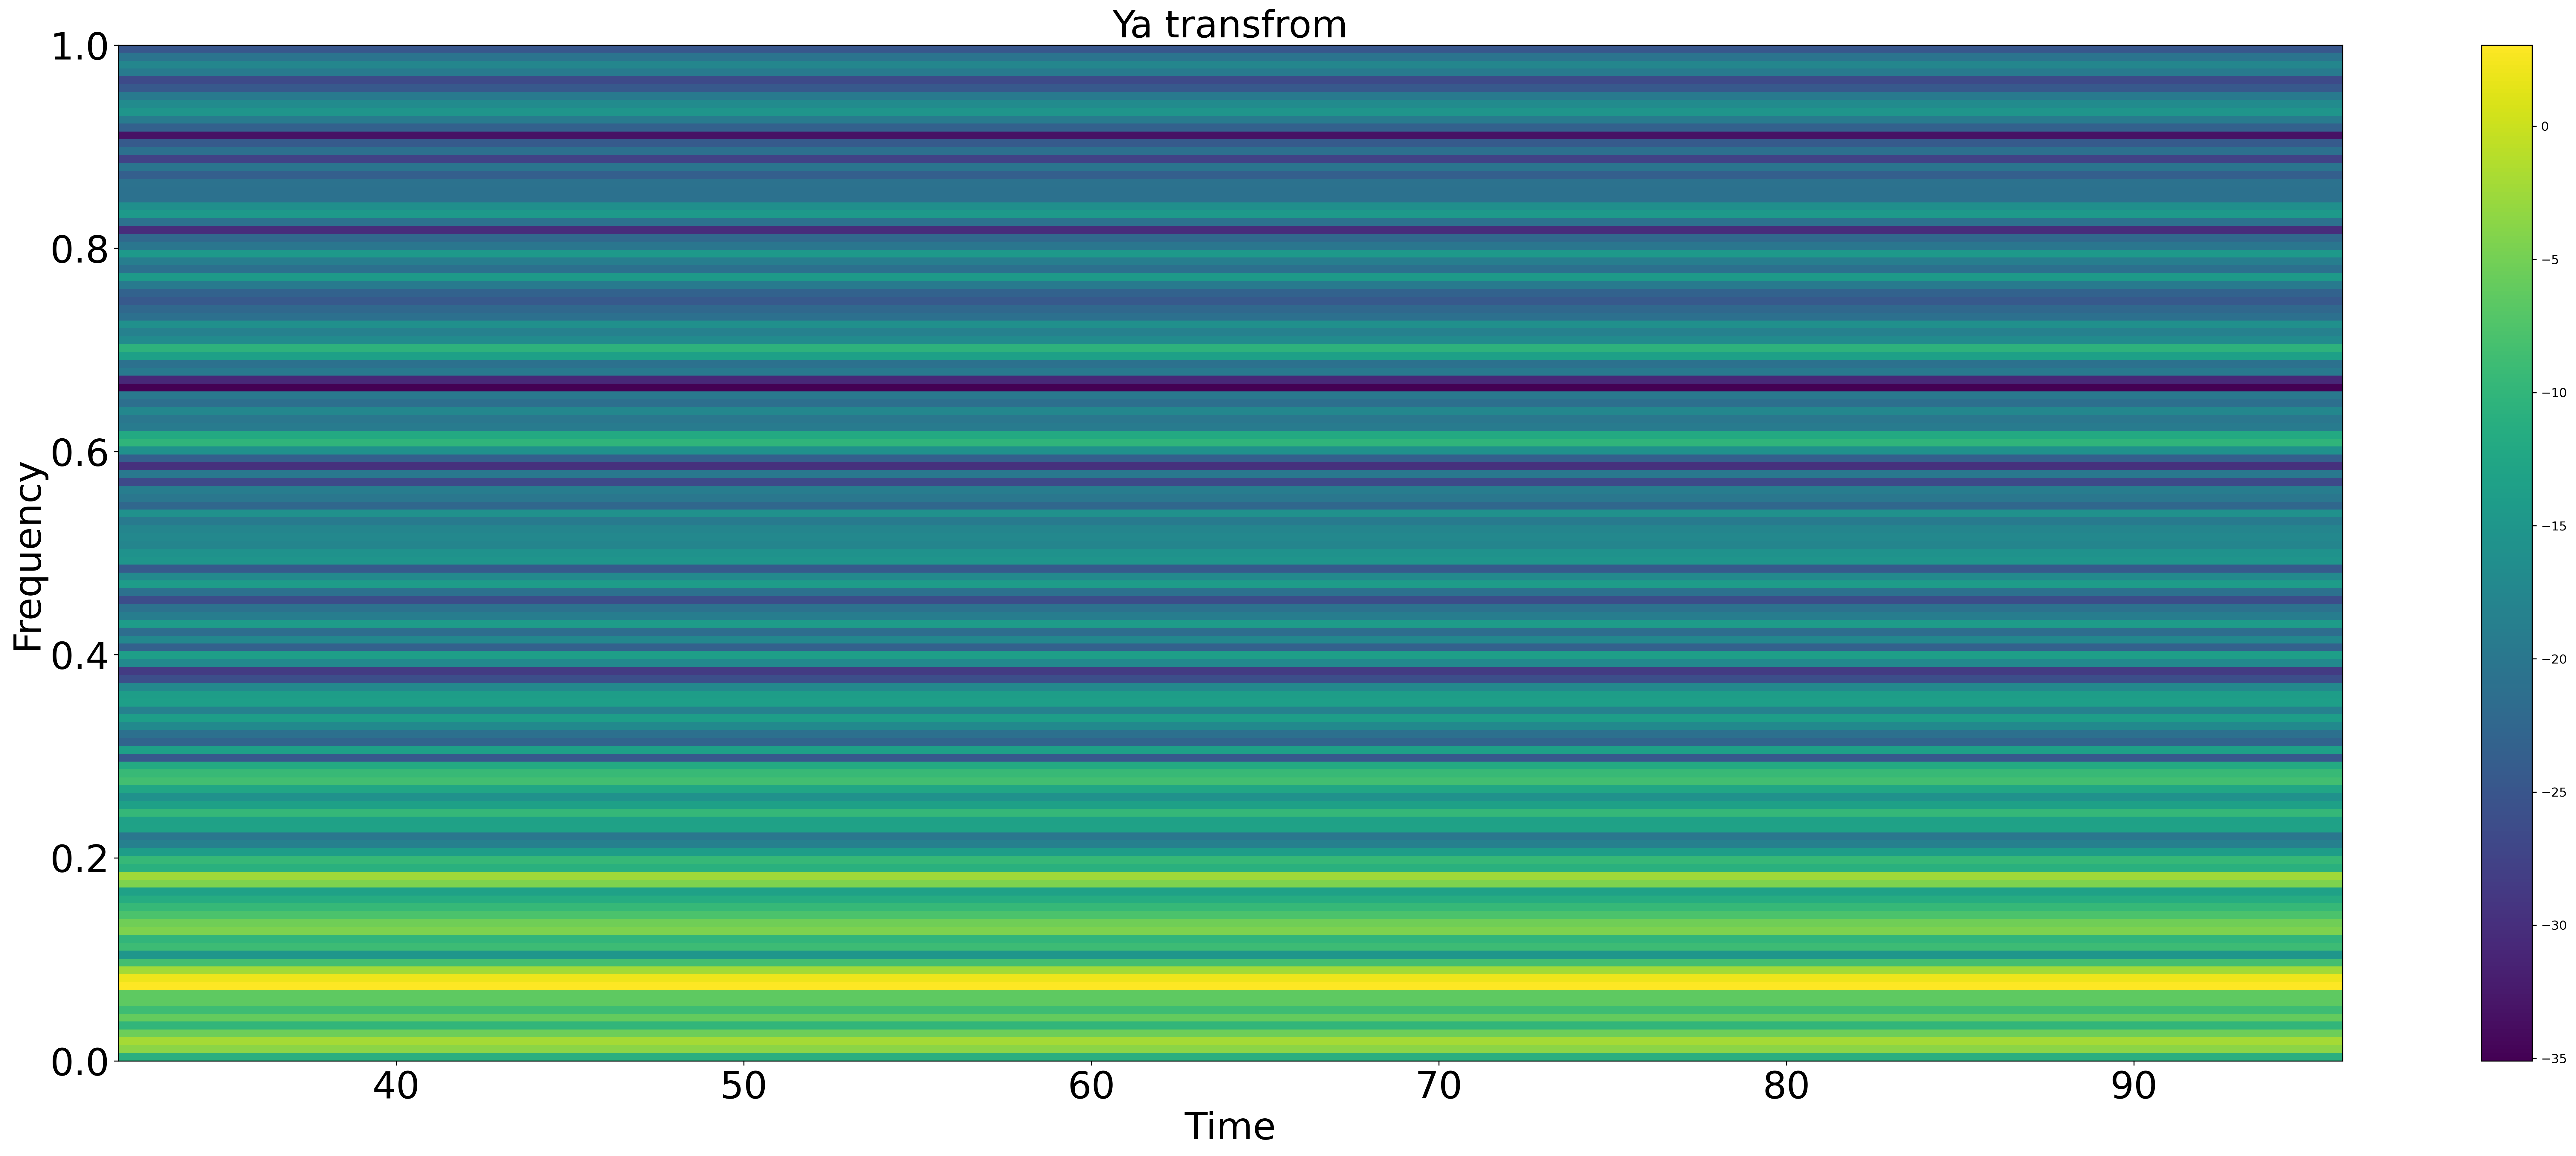

/var/folders/nn/k75mfp3946lf7jzz8pdhmkyr0000gn/T/ipykernel_21471/3517152436.py:34: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=254).
  plt.specgram(data[:,3])


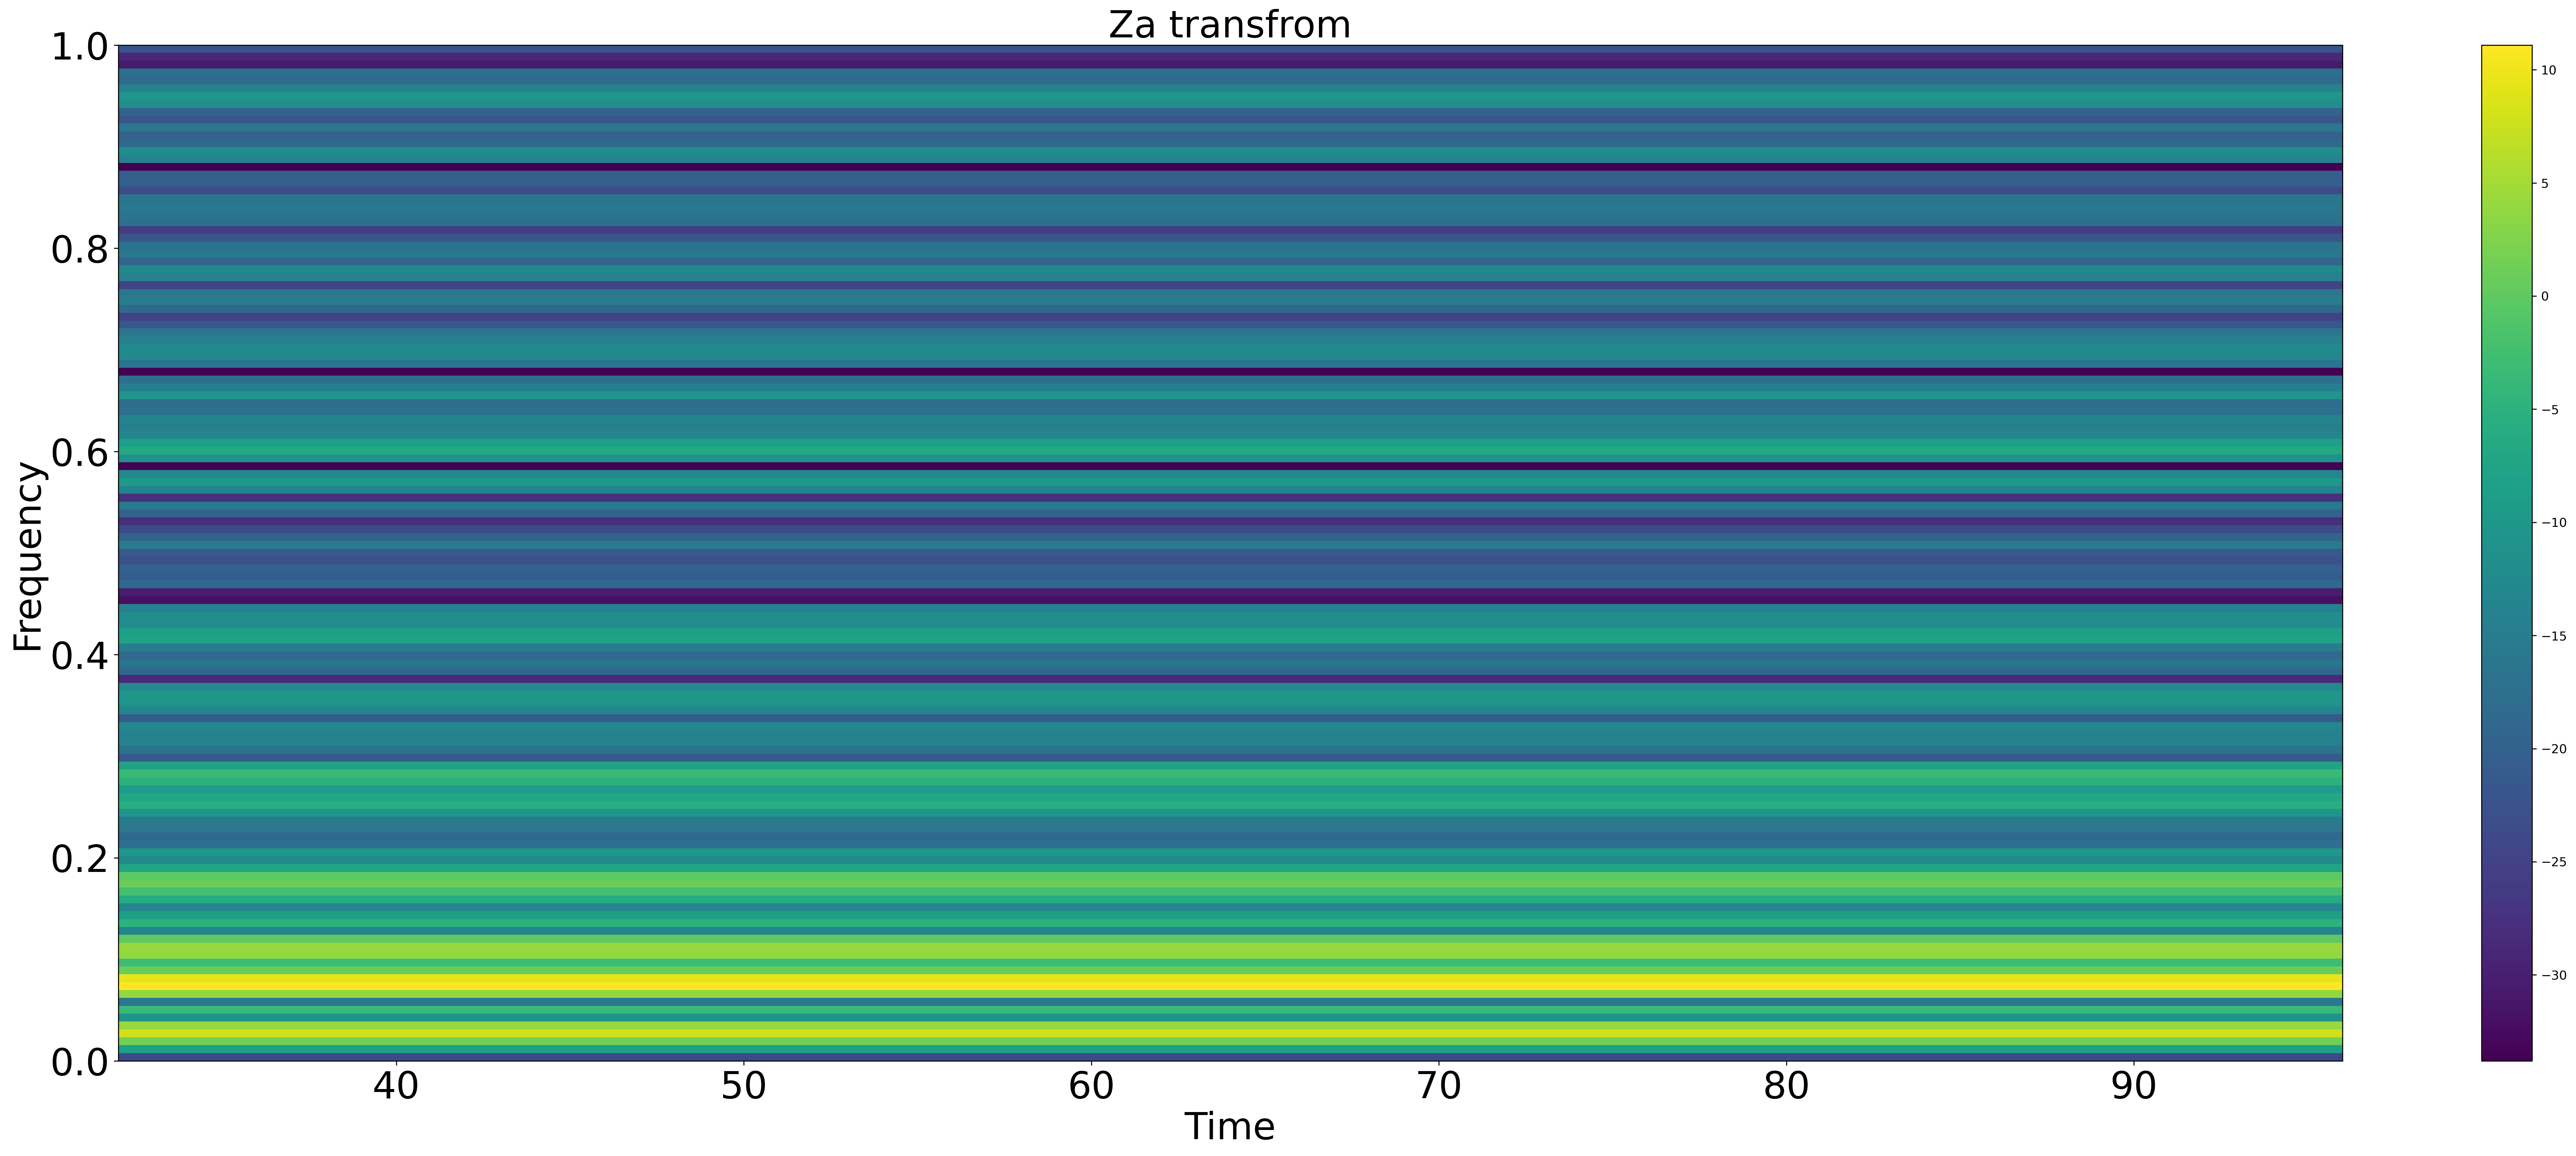

In [5]:
# plot_color_gradients('Sequential',
#                      ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#                       'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
#                       'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'])
# plot_color_gradients('Perceptually Uniform Sequential',
#                      ['viridis', 'plasma', 'inferno', 'magma', 'cividis'])

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Xa transfrom',fontsize = 30)  
plt.specgram(data[:,1],Fs=1,cmap='plasma')
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Ya transfrom',fontsize = 30)  
plt.specgram(data[:,2])
plt.colorbar()
plt.show()

plt.figure(figsize = (40, 15), dpi = 300, linewidth = 4)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel('Frequency',fontsize = 30)
plt.xlabel('Time',fontsize = 30)
plt.title('Za transfrom',fontsize = 30)  
plt.specgram(data[:,3])
plt.colorbar()
plt.show()